<a href="https://colab.research.google.com/github/Davron030901/Matplotlib_and_Seaborn/blob/main/Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMAGE GENERATION

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Create 200x200 random grayscale image

Values: 0-255, dtype=uint8

 Set seed=42 for reproducibility

In [2]:
np.random.seed(42)
img = np.random.randint(0, 256, size=(200, 200), dtype=np.uint8)
print("Gray img:", img)

Gray img: [[102 220 225 ... 251  49  23]
 [174  74   1 ...  37   4   8]
 [190 178  54 ... 129  26 182]
 ...
 [ 78 220 206 ... 219 172 190]
 [ 61  55  34 ... 139  64 174]
 [ 97 170  92 ...  61 105  83]]


Calculate and print basic statistics
- Mean brightness
- Standard deviation (contrast)
- Min and max pixel values
- Median
Sizning kodingiz:

In [3]:
print("Mean:", img.mean())
print("Standart deviation:", img.std())
print("Min:", img.min())
print("Max:", img.max())
print("Median:", np.median(img))

Mean: 127.1957
Standart deviation: 73.63041050754777
Min: 0
Max: 255
Median: 127.0


#IMAGE PROCESSING

Binary threshold

In [4]:
threshold = img.copy()
image_bimary = np.where(threshold > 127, 255, 0)
print("Binary image:", image_bimary)

Binary image: [[  0 255 255 ... 255   0   0]
 [255   0   0 ...   0   0   0]
 [255 255   0 ... 255   0 255]
 ...
 [  0 255 255 ... 255 255 255]
 [  0   0   0 ... 255   0 255]
 [  0 255   0 ...   0   0   0]]


Range threshold

In [5]:
threshold = img.copy()
image_range = np.where((threshold > 50) & (threshold < 200), threshold, 0)
print("Range image:", image_range)

Range image: [[102   0   0 ...   0   0   0]
 [174  74   0 ...   0   0   0]
 [190 178  54 ... 129   0 182]
 ...
 [ 78   0   0 ...   0 172 190]
 [ 61  55   0 ... 139  64 174]
 [ 97 170  92 ...  61 105  83]]


Brightness **adjustment**

In [6]:
brightness = img.copy()
image = np.clip(brightness + 50, 0, 255)
print("Clipped image:", image)

Clipped image: [[152  14  19 ...  45  99  73]
 [224 124  51 ...  87  54  58]
 [240 228 104 ... 179  76 232]
 ...
 [128  14   0 ...  13 222 240]
 [111 105  84 ... 189 114 224]
 [147 220 142 ... 111 155 133]]


Contrast enhancement

In [7]:
brightness = img.copy()
image = np.clip(brightness * 1.5, 0, 255)
print("Clipped image:", image)

Clipped image: [[153.  255.  255.  ... 255.   73.5  34.5]
 [255.  111.    1.5 ...  55.5   6.   12. ]
 [255.  255.   81.  ... 193.5  39.  255. ]
 ...
 [117.  255.  255.  ... 255.  255.  255. ]
 [ 91.5  82.5  51.  ... 208.5  96.  255. ]
 [145.5 255.  138.  ...  91.5 157.5 124.5]]


#IMAGE ANALYSIS

Row-wise mean brightness

Calculate mean brightness for each row

 Find brightest and darkest rows

In [8]:
print("Row-wise mean brightness:", img.mean(axis=1))
print("Brightest row:", img.mean(axis=1).argmax())
print("Darkest row:", img.mean(axis=1).argmin())

Row-wise mean brightness: [132.66  116.72  124.265 129.655 128.28  122.845 130.14  132.8   129.51
 133.96  127.905 119.65  112.235 133.63  123.9   130.49  125.925 135.52
 127.85  128.455 133.6   128.115 134.43  125.56  120.3   122.4   118.585
 129.63  118.245 120.99  136.66  125.64  125.37  125.36  134.11  127.075
 134.38  129.23  126.33  124.21  124.39  130.05  137.205 130.955 127.325
 121.27  122.865 130.265 124.635 126.15  133.62  132.83  125.325 120.29
 133.985 124.715 121.705 129.835 135.52  122.935 126.27  129.255 129.2
 129.105 127.235 127.8   128.435 128.06  120.815 127.51  130.685 125.77
 134.535 126.635 138.045 124.705 127.825 123.11  133.92  119.795 132.495
 127.315 116.705 125.785 124.175 134.58  122.5   125.355 123.445 125.445
 123.15  118.315 124.38  129.725 122.89  123.685 126.13  126.38  127.79
 135.495 134.475 118.685 129.57  123.57  128.575 131.485 130.81  122.81
 130.31  134.33  137.62  128.775 133.45  123.255 135.065 123.64  129.84
 129.815 120.11  125.995 115.59  1

Count dark vs light pixels

 Dark: < 100, Light: >= 100

 Print counts and percentages

In [9]:
img_count = img.copy()
dark_image = img_count[img_count < 100]
light_image = img_count[img_count >= 100]
print("Image count:", len(img_count))
print("Dark pixels:", len(dark_image))
print("Light pixels:", len(light_image))
print("Dark pixels percentage:", len(dark_image) / (len(dark_image) + len(light_image)) * 100)
print("Light pixels percentage:", len(light_image) / (len(dark_image) + len(light_image)) * 100)

Image count: 200
Dark pixels: 15606
Light pixels: 24394
Dark pixels percentage: 39.015
Light pixels percentage: 60.985


#VISUALIZATION

Create 2x3 subplot grid

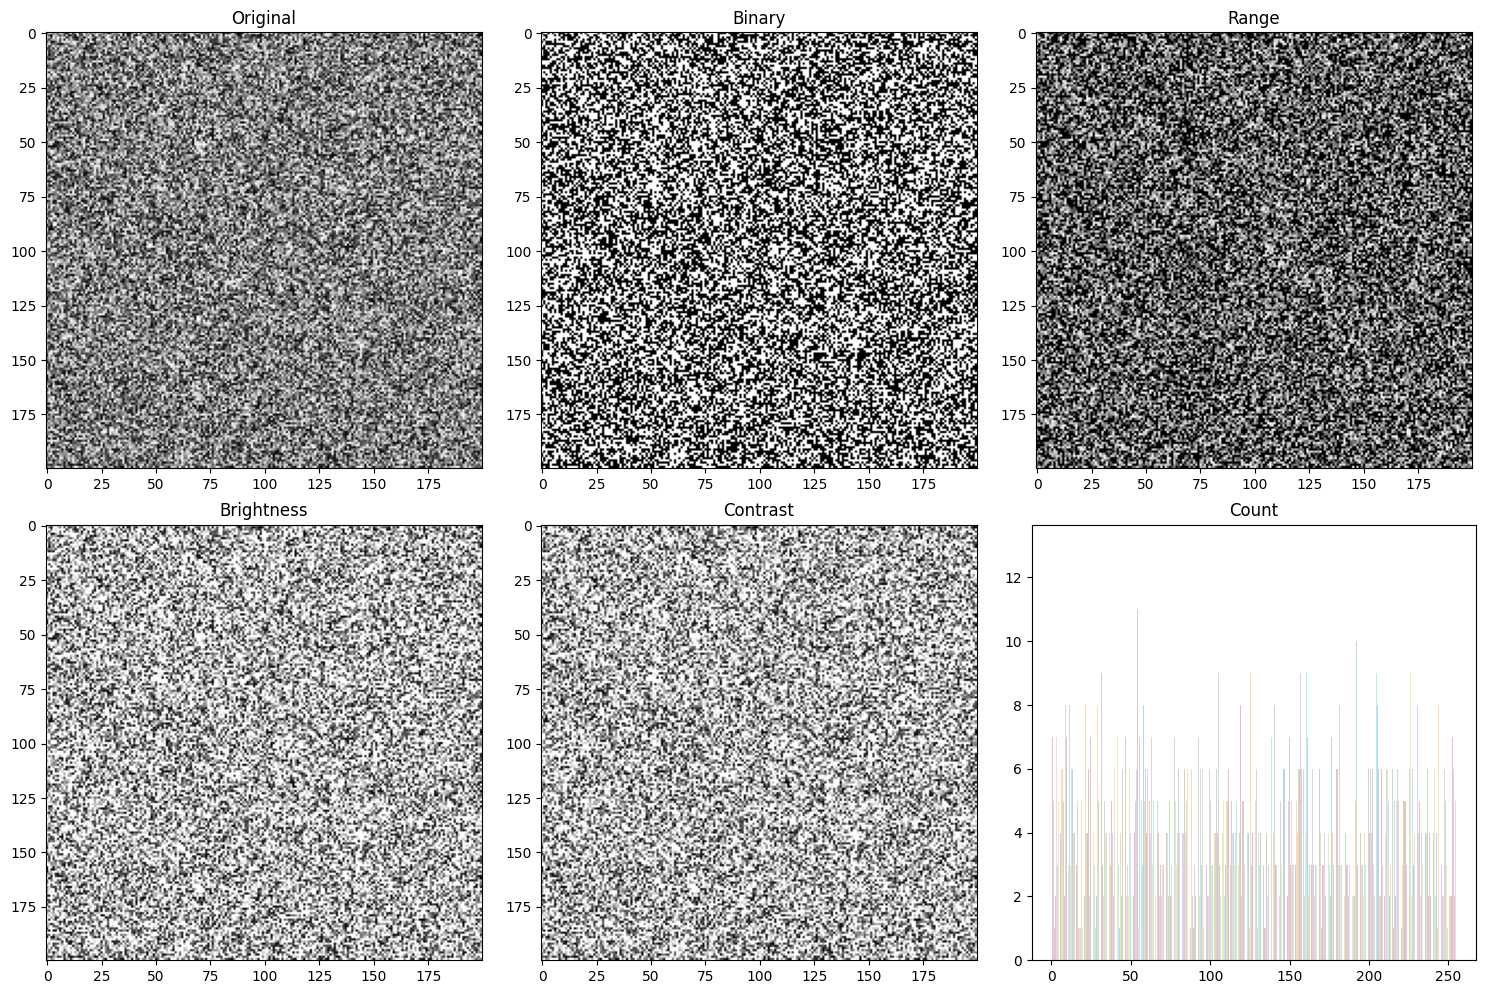

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(img, cmap="gray")
axes[0, 0].set_title('Original')

axes[0, 1].imshow(image_bimary, cmap='gray')
axes[0, 1].set_title('Binary')

axes[0, 2].imshow(image_range, cmap="gray")
axes[0, 2].set_title('Range')

axes[1, 0].imshow(image, cmap="gray")
axes[1, 0].set_title('Brightness')

axes[1, 1].imshow(image, cmap='gray')
axes[1, 1].set_title('Contrast')

axes[1, 2].hist(img, bins=50, alpha=0.3)
axes[1, 2].set_title('Count')

plt.tight_layout()
plt.show()

##Edge detection (simple)

Calculate horizontal gradient: diff between adjacent columns

 Use np.diff(img, axis=1)

 Display result

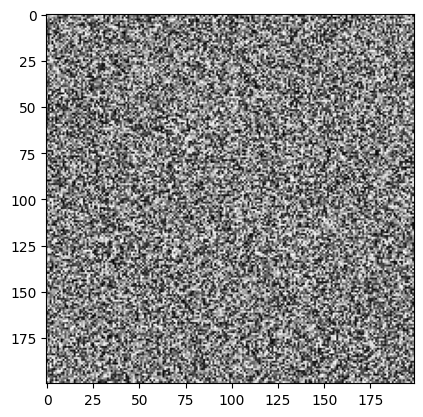

In [11]:
img_diff = np.diff(img, axis=1)
plt.imshow(img_diff, cmap="gray")
plt.show()

#Image quality metrics

Calculate:
 - SNR (Signal-to-Noise Ratio) = mean / std
 - Dynamic range = max - min
 - Entropy (histogram-based, simplified)

SNR: 1.7274886710968604
Dynamic range: 255


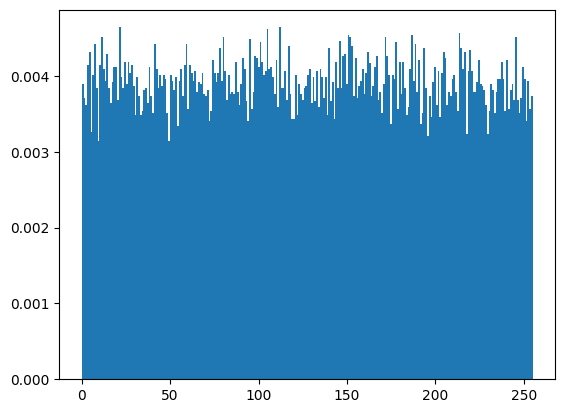

In [12]:
snr = img.mean() / img.std()
print("SNR:", snr)

dynamic_range = img.max() - img.min()
print("Dynamic range:", dynamic_range)
plt.hist(img.ravel(), bins=256, range=(0, 255), density=True)
plt.show()

Add colorbar to each image subplot

And add overall figure title

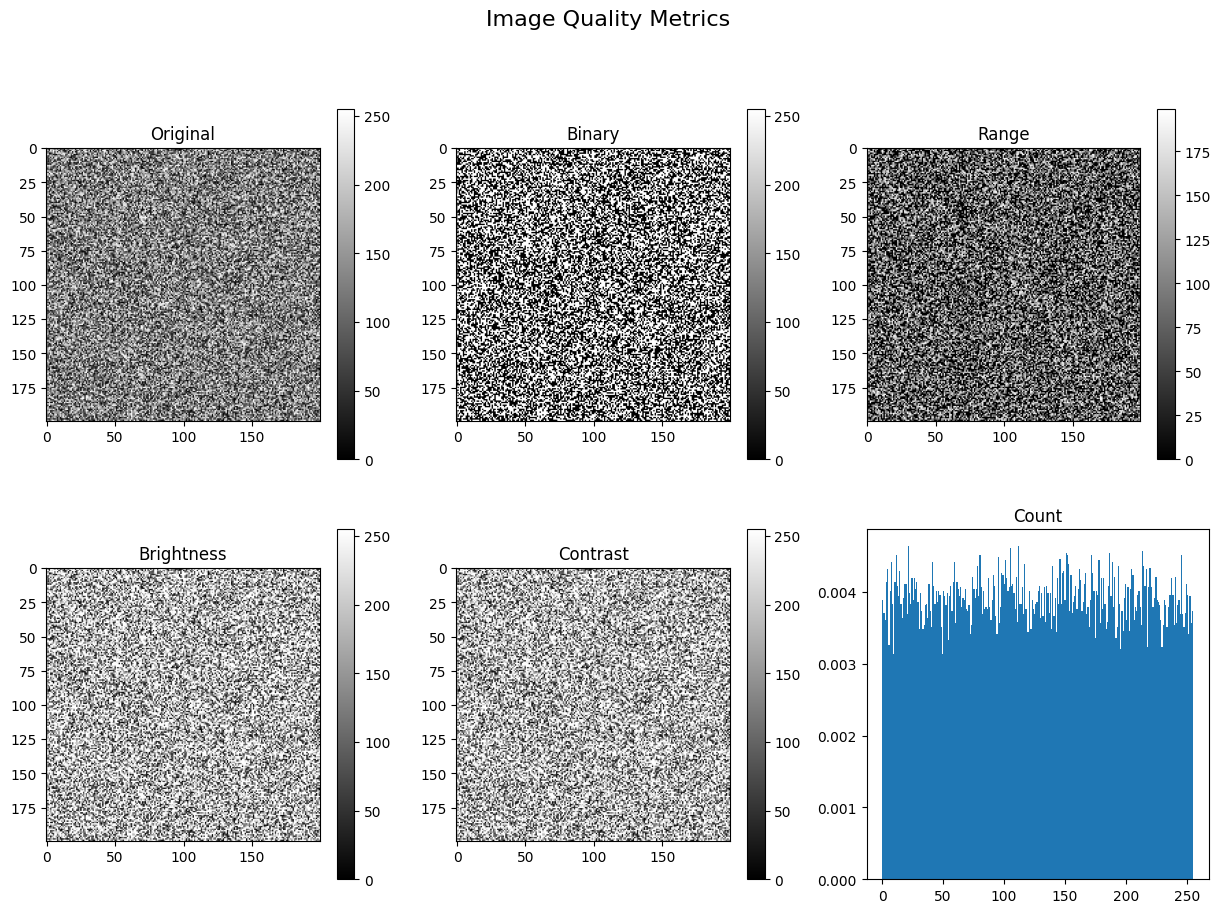

In [13]:
plt.figure(figsize=(15, 10))
plt.suptitle("Image Quality Metrics", fontsize=16)
plt.subplot(2, 3, 1)
plt.imshow(img, cmap="gray")
plt.title("Original")
plt.colorbar()
plt.subplot(2, 3, 2)
plt.imshow(image_bimary, cmap="gray")
plt.title("Binary")
plt.colorbar()
plt.subplot(2, 3, 3)
plt.imshow(image_range, cmap="gray")
plt.title("Range")
plt.colorbar()
plt.subplot(2, 3, 4)
plt.imshow(image, cmap="gray")
plt.title("Brightness")
plt.colorbar()
plt.subplot(2, 3, 5)
plt.imshow(image, cmap="gray")
plt.title("Contrast")
plt.colorbar()
plt.subplot(2, 3, 6)
plt.hist(img.ravel(), bins=256, range=(0, 255), density=True)
plt.title("Count")
plt.show()